In [1]:
from modules.data_loading import load_train_data, load_test_data
from modules.data_preprocessing import clean_data, feature_engineering
import pandas as pd
import numpy as np
import ydata_profiling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
#from math import sqrt
#import re
#from datetime import datetime
#from sklearn.preprocessing import StandardScaler
#from sklearn.manifold import TSNE
#from sklearn.cluster import KMeans
from modules.figure_generation import TSNE_kMeans_figure, random_forest_features
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=load_train_data()
df_cleaned = clean_data(df)
df_engineered = feature_engineering(df_cleaned)
df_engineered.shape[0]

1760

In [3]:
# Extract quantitative columns
quantitatives = df_engineered.select_dtypes(include=['int64', 'float64']).copy()
# Drop the 'ID' column
quantitatives = quantitatives.drop(columns=['ID','price', 'rooms', 'bedrooms', 'washrooms', 'year_built',
                                            'has_certificate', 'year_certificate', 'due_certificate',
                                            'Plinthes électriques', 'Convecteurs',
                                            'Eau chaude', 'Air soufflé (pulsé)', 'Radiant', 'Thermopompe',
                                            'Gaz naturel', 'Poêle à bois', 'Foyer au gaz',
                                            'Porte de garage électrique',
                                            'Buanderie', 'Climatiseur', 'Aspirateur centrale', 'Spa',
                                            "Détecteur d'incendie (relié)", "Détecteur d'incendie (non relié)",
                                            'Adapté pour personne à mobilité réduite', 'Interphone', 'Fournaise',
                                            'Planchers chauffant', 'Ascenseur', "Échangeur d'air",
                                            "Système d'alarme", 'Borne de recharge', 'has_reno', 'last_year_reno', 'water_access',
                                            'min_price', 'max_price', 'fireplace_func', 'has_fireplace', 'has_pool', 'near_water', 'living_area'])


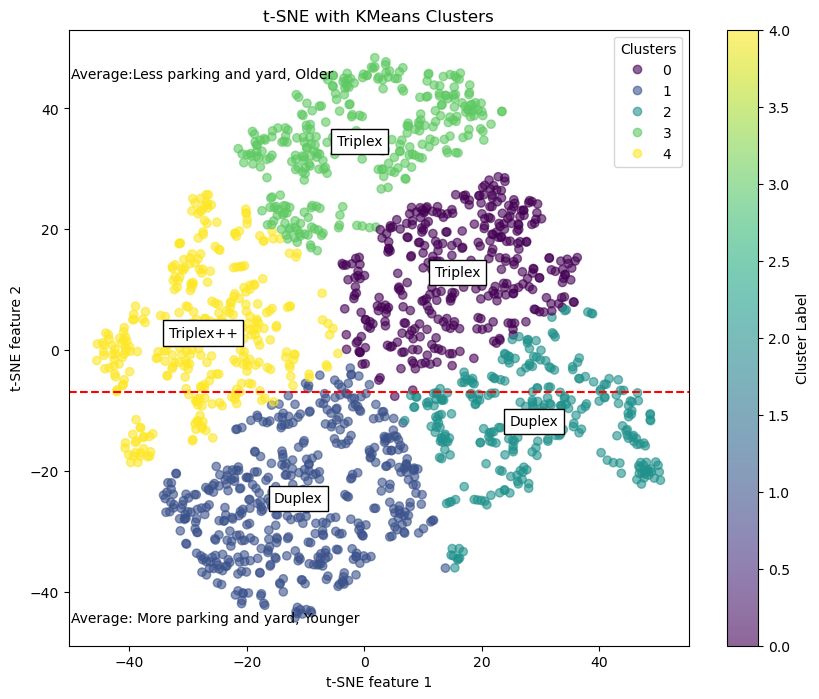

In [4]:
TSNE_kMeans_figure(quantitatives)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        99
           1       0.93      0.99      0.96       154
           2       0.94      0.93      0.93        82
           3       0.88      0.93      0.90        90
           4       0.93      0.87      0.90       103

    accuracy                           0.92       528
   macro avg       0.92      0.92      0.92       528
weighted avg       0.93      0.92      0.92       528



<Figure size 1200x800 with 0 Axes>

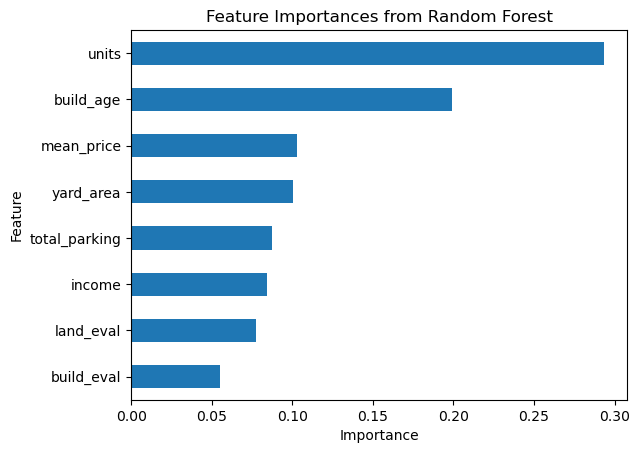

In [5]:
random_forest_features(quantitatives)

EDA Profiling

In [6]:
quantitatives['price'] = df_engineered['price']
profile = quantitatives.profile_report()
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]